In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [5]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p","rb"))
    results_dict.update(pickle.load(open("arima_model_scores.p","rb")))
    results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['RMSE','MAE','R2'])

    results_df = results_df.sort_values(by='RMSE',ascending=False).reset_index()

    return results_df


In [6]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,RandomForest,18035.414871,15064.916667,0.988522
1,LinearRegression,16221.040791,12433.000000,0.990716
2,XGBoost,15701.003360,13342.666667,0.991301
3,ARIMA,15075.168039,11387.886132,0.983310


In [14]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='mediumblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    sns.despine()
    
    plt.savefig('compare_models.png')

c:\ProgramData\Anaconda3\envs\ai\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\ai\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


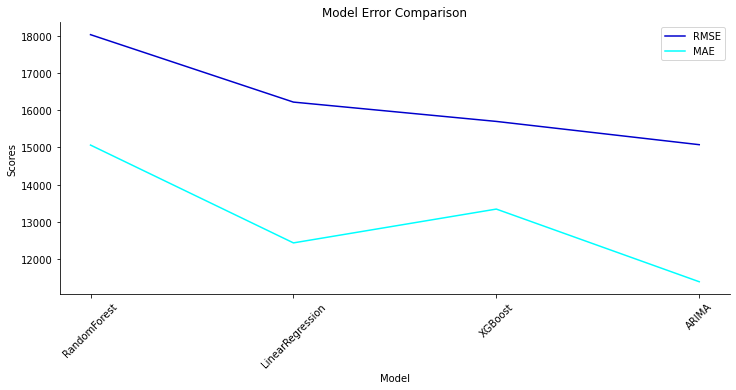

In [15]:
plot_results(results)

In [16]:
average_monthly_sales = 894478 #see eda notebook
gboost = 11649.666667
percentage_off = round(gboost/average_monthly_sales*100, 2)

print(f"With XGBoost, prediction is within {percentage_off}% of the actual.")

With XGBoost, prediction is within 1.3% of the actual.
